
Before running this block, make sure to upload "data.mat" in the google drive.

In [ ]:
#Enter your path of dataset from google drive  
import scipy.io as sio
GOOGLE_COLAB = True
path = "/content/drive/MyDrive/data.mat"
if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive/')
    path = "/content/drive/My Drive/"

dataset = path + "data.mat" 

#Enter path of your test image
test_image=path+"test.jpg"
mat_contents = sio.loadmat(dataset)
mat_contents
images = mat_contents['images']
label = mat_contents['C']
images.shape

Mounted at /content/drive/


(50, 3072)

If you can see the shape of images in 'data.mat' then your data has been read. 

In [ ]:
import numpy as np 
images= np.transpose(images)
images.shape
im = np.reshape(images, [ 32, 32, 3, -1], order="F")

(32, 32, 3)


(32, 32, 3)

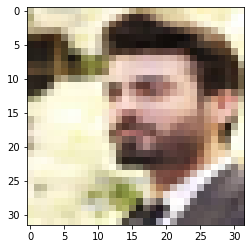

In [ ]:
from matplotlib import pyplot as plt
#import cv2

plt.imshow(im[:,:,:,40])
print(im[:,:,:,0].shape)
a= im[:,:,:,40]
plt.imshow(a)
a.shape

You Need to write your code in this block.

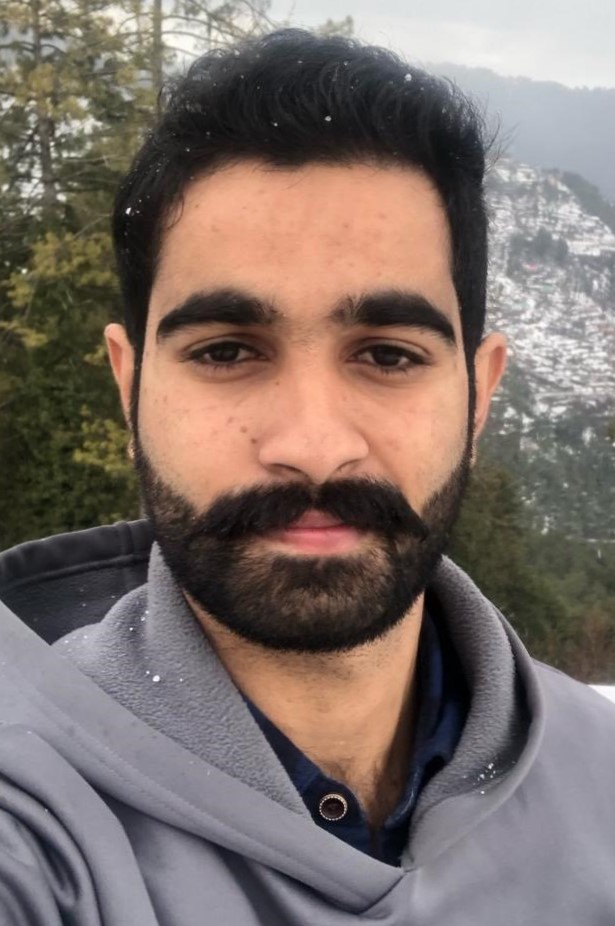

(3072, 1)
Euclidean distances: [565.83478154 571.93093989 566.81654881 550.29628383 570.76089565
 576.59344429 572.61680031 556.62105602 564.75392872 572.85774849
 568.27722108 567.68829475 569.7990874  559.56232897 575.55799013
 562.78326201 576.80932725 566.10158099 562.07116987 569.30132619
 567.50154185 579.87671103 575.86196263 566.49360102 570.8467395
 579.34273103 563.95478542 558.20336796 555.26480169 552.75491857
 566.23493357 575.51628995 568.00968302 567.07671439 568.19274899
 555.80032386 568.4074243  569.56650182 566.69039166 567.68565245
 572.98429298 573.97473812 565.14599884 561.81669609 571.2302513
 564.08155439 561.05258221 556.30477258 569.64374832 561.99021344]

sorted indexs of Euclidean distances [ 3 29 28 35 47  7 27 13 46 43 49 18 15 26 45  8 42  0 17 30 23 38  2 33
 20 39 11 32 34 10 36 19 37 48 12  4 24 44  1  6  9 40 41 31 14 22  5 16
 25 21]


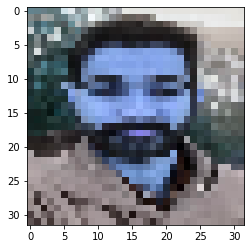

In [ ]:
from scipy import misc
import cv2
from math import sqrt
from numpy import ndarray


for i in range(50):
    G = im[:,:,:,i]
    G = np.reshape(G,[-1], order="F")

    #Read your image here
####### Your code here #######

from google.colab.patches import cv2_imshow 
img=cv2.imread("/content/drive/MyDrive/ibrar.jpeg") 
cv2_imshow(img)



############################
   

    #Resize your image 
####### Your code here #######
resiz=cv2.resize(img,(32,32))
plt.figure()
plt.imshow(resiz)



##############################
   
   
    #Reshape your image as we reshape the image of dataset
####### Your code here #######

reshap=ndarray.reshape(resiz,[3072,1],order="F")
print(reshap.shape)

#############################
    #Calculate Eucleadian distance between your image and dataset 
####### Your code here #######
def ed(r1,r2):
  dis=0.0
  for i in range(len(r1)):    #length of row image=3072.r1=r2  
    dis=dis+((r1[i]-r2[i]))**2
  return sqrt(dis)  

dist= np.zeros(50)

for i in range(50):
  targetimage=images[0:3072,i]
  dist[i]=ed(reshap,targetimage)

print("Euclidean distances:",dist)
print("")
a=ndarray.argsort(dist)
print("sorted indexs of Euclidean distances",a)


##############################

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In this Block you need to fill the code for 1-NN. 

minimum Euclidean distance: 550.2962838326278
index of minimum distance : 3
label of nearest neighbours [array(['morgan freeman'], dtype='<U14')]


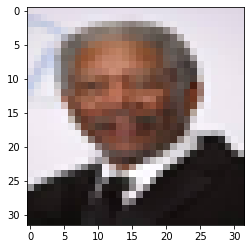

In [ ]:
# Write code for 1 NN
#Find min distance
#Fine at which point min value exists

####### Your code here #######
dist= np.zeros(50)

for i in range(50):
  targetimage=images[0:3072,i]
  dist[i]=ed(reshap,targetimage)


print("minimum Euclidean distance:",min(dist))
index_mindistance=ndarray.argmin(dist)
print("index of minimum distance :",index_mindistance)
plt.imshow(im[:,:,:,index_mindistance])
print("label of nearest neighbours",label[index_mindistance])






##############################


Write code for 3 NN


index of nearest neighbours 3
label of nearest neighbours [array(['morgan freeman'], dtype='<U14')]
Euclidean Distance of neighbours 550.2962838326278

index of nearest neighbours 29
label of nearest neighbours [array(['bilawal bhutto'], dtype='<U14')]
Euclidean Distance of neighbours 552.7549185669902

index of nearest neighbours 28
label of nearest neighbours [array(['bilawal bhutto'], dtype='<U14')]
Euclidean Distance of neighbours 555.2648016937504


nearest neighbour using 3 majority votes is with label [array(['bilawal bhutto'], dtype='<U14')]


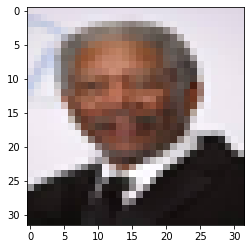

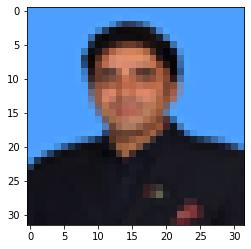

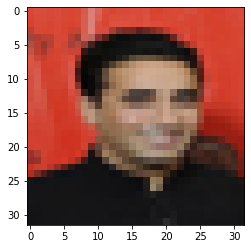

In [ ]:
#3 NN
#Write code for 3 NN
#Find 3 min distances
#Find their instances
#hint: Use for Loop

####### Your code here #######
for i in range(3):
 nearest_neighbours=(a[i])
 print("index of nearest neighbours",nearest_neighbours)
 print("label of nearest neighbours",label[nearest_neighbours])
 print("Euclidean Distance of neighbours",dist[nearest_neighbours])
 print("")
 plt.figure()
 plt.imshow(im[:,:,:,nearest_neighbours])
 
print("")

values, counts = np.unique(nearest_neighbours, return_counts=True)
y= values[np.argmax(counts)]
print("nearest neighbour using 3 majority votes is with label",label[y])

  
   



##############################

Write code for 5 NN

index of nearest neighbours 3
label of nearest neighbours [array(['morgan freeman'], dtype='<U14')]
Euclidean Distance of neighbours 550.2962838326278

index of nearest neighbours 29
label of nearest neighbours [array(['bilawal bhutto'], dtype='<U14')]
Euclidean Distance of neighbours 552.7549185669902

index of nearest neighbours 28
label of nearest neighbours [array(['bilawal bhutto'], dtype='<U14')]
Euclidean Distance of neighbours 555.2648016937504

index of nearest neighbours 35
label of nearest neighbours [array(['aishwarya rai'], dtype='<U13')]
Euclidean Distance of neighbours 555.8003238574083

index of nearest neighbours 47
label of nearest neighbours [array(['mahira khan'], dtype='<U11')]
Euclidean Distance of neighbours 556.3047725842373


nearest neighbour using 5 majority votes is with label [array(['mahira khan'], dtype='<U11')]


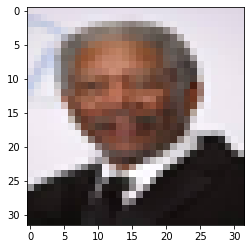

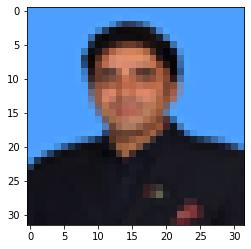

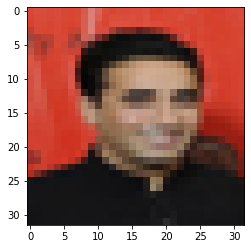

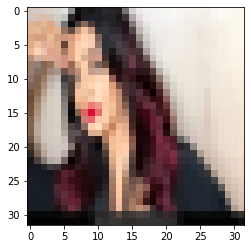

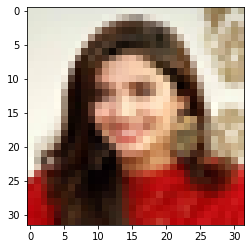

In [ ]:
#Write code for 5 NN
#Find 5 min distances
#Find their instances

####### Your code here #######
for i in range(5):
 nearest_neighbours=(a[i])
 print("index of nearest neighbours",nearest_neighbours)
 print("label of nearest neighbours",label[nearest_neighbours])
 print("Euclidean Distance of neighbours",dist[nearest_neighbours])
 print("")
 plt.figure()
 plt.imshow(im[:,:,:,nearest_neighbours])
 
print("")

values, counts = np.unique(nearest_neighbours, return_counts=True)
y= values[np.argmax(counts)]

print("nearest neighbour using 5 majority votes is with label", label[y])

  

##############################